# DS-HW[3] Data Visualization

## Problem 1. Data Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

data = pd.read_csv("dataset/ds_hw3_dataset.csv")

In [2]:
data.head()

nSeq  PORT4_CHN1  PORT6_CHN1  PORT7_CHN1
0     0     -0.2087     -0.4806      0.3770
1     1     -0.2104     -0.4819      0.3759
2     2     -0.2103     -0.4822      0.3798
3     3     -0.2119     -0.4819      0.3806
4     4     -0.2148     -0.4812      0.3823

In [3]:
nSeq = data['nSeq']
sensor = data.drop(['nSeq'], axis=1)

print(sensor)

       PORT4_CHN1  PORT6_CHN1  PORT7_CHN1
0         -0.2087     -0.4806      0.3770
1         -0.2104     -0.4819      0.3759
2         -0.2103     -0.4822      0.3798
3         -0.2119     -0.4819      0.3806
4         -0.2148     -0.4812      0.3823
...           ...         ...         ...
30445     -0.0059     -0.6162      0.1777
30446     -0.0034     -0.6157      0.1780
30447     -0.0037     -0.6145      0.1772
30448      0.0000     -0.6157      0.1820
30449      0.0005     -0.6144      0.1855

[30450 rows x 3 columns]


In [4]:
parameter = data.columns.drop(['nSeq'])
colors = {'PORT4_CHN1':'blue', 'PORT6_CHN1':'orange', 'PORT7_CHN1':'limegreen'}

1) Three line chart for each parameter.

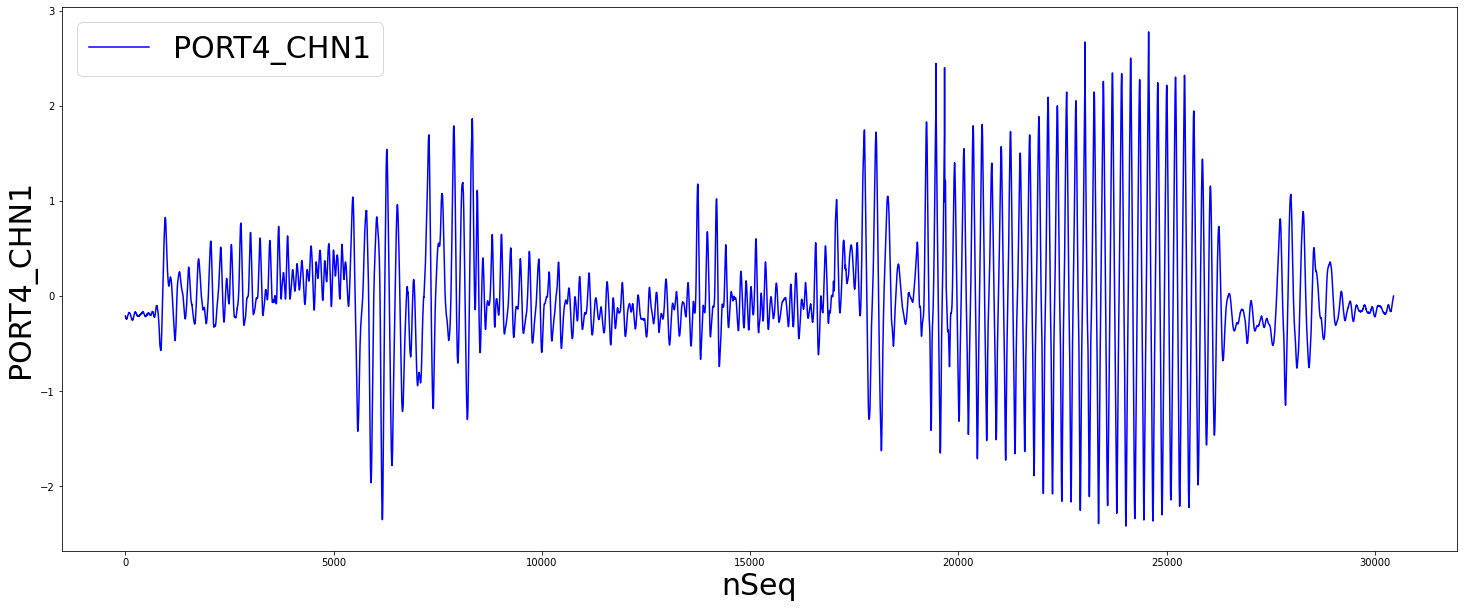

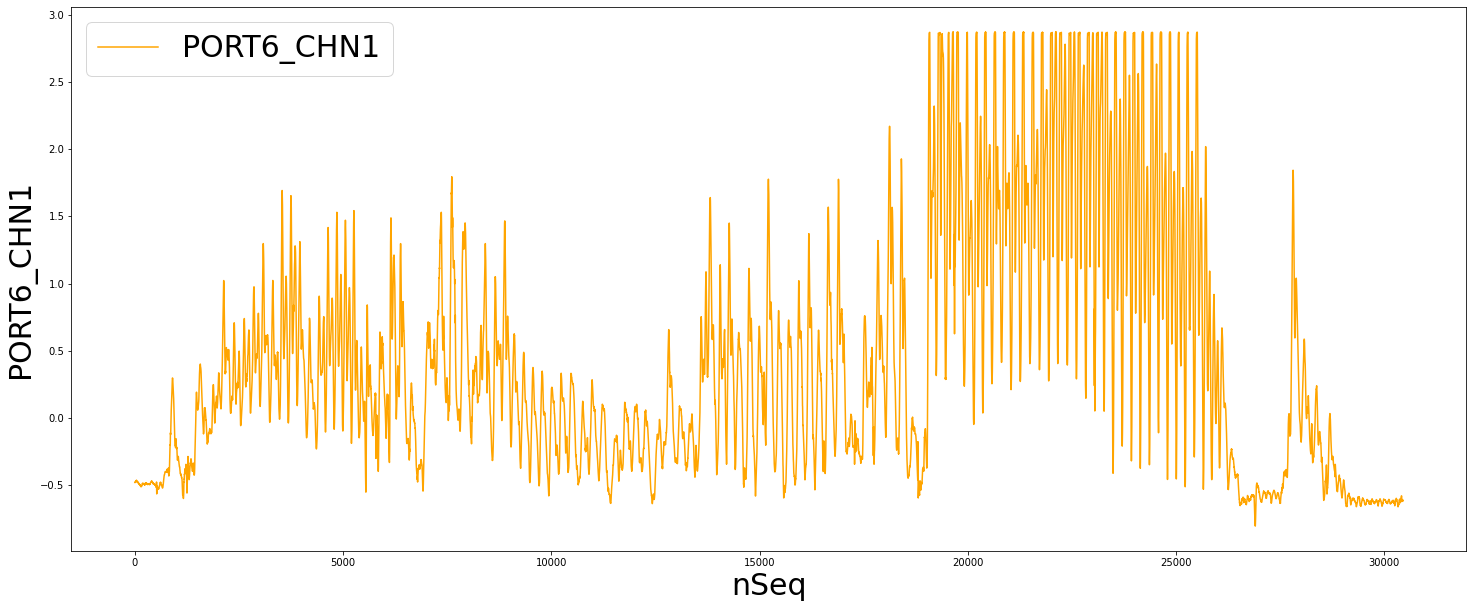

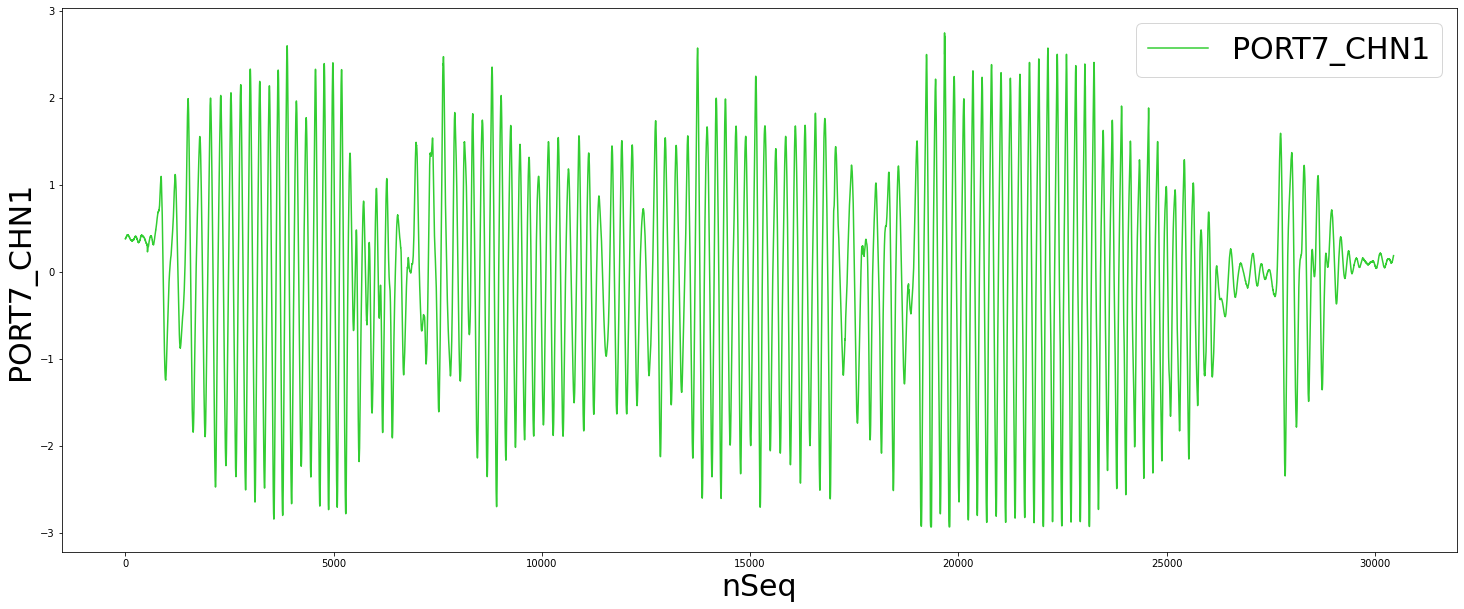

In [13]:
for x in parameter:
    plt.figure(figsize = (25,10))
    plt.plot(nSeq, sensor[x], c=colors[x])
    plt.xlabel('nSeq', fontsize = 30)
    plt.ylabel(x, fontsize = 30)
    plt.legend([x], fontsize = 30)



Problem 2-3) 각 Port별로 line chart를 출력한 결과이다. 

2) A integrated line chart for each parameter on one graph.

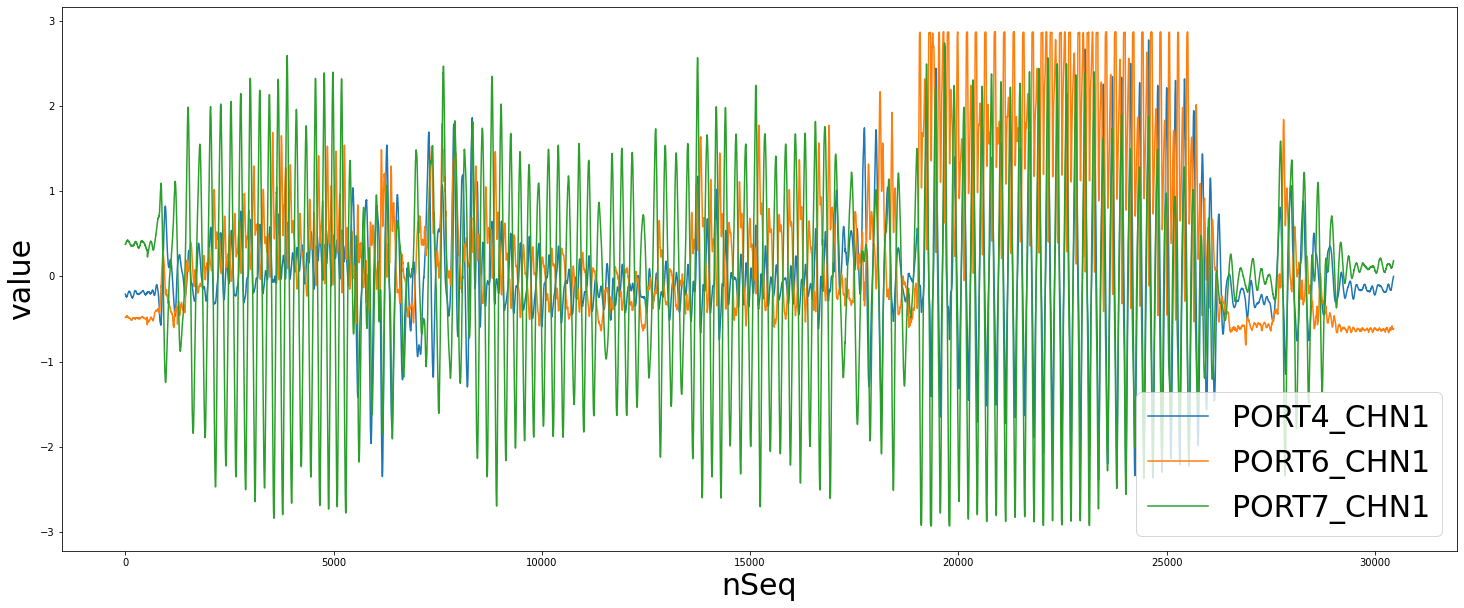

In [12]:
plt.figure(figsize = (25,10))
plt.plot(sensor)

plt.ylabel('value', fontsize = 30)
plt.xlabel('nSeq', fontsize = 30)
plt.legend(['PORT4_CHN1', 'PORT6_CHN1', 'PORT7_CHN1'], fontsize = 30)

Problem 2-1) Parameter 별로 line chart를 출력한 것과 한 graph안에 모두 다 출력한 것을 비교했을 때 각기 장단점이 있다고 결론내릴 수 있다. 우선 parameter 별로 출력을 진행했을 때는 다른 parameter graph가 확인하고자 하는 parameter의 값을 침범하지 않으므로 모두 출력했을 때보다 확인하고 싶은 Port의 data를 파악하는데는 용이했다. 하지만 모두 출력했을 때의 경우 각기 다른 화면에 출력한 것보다 서로를 비교하기에 용이했다.

3) Scatter each parameter value on one graph(same condition as (2)).

Text(0, 0.5, 'Value')

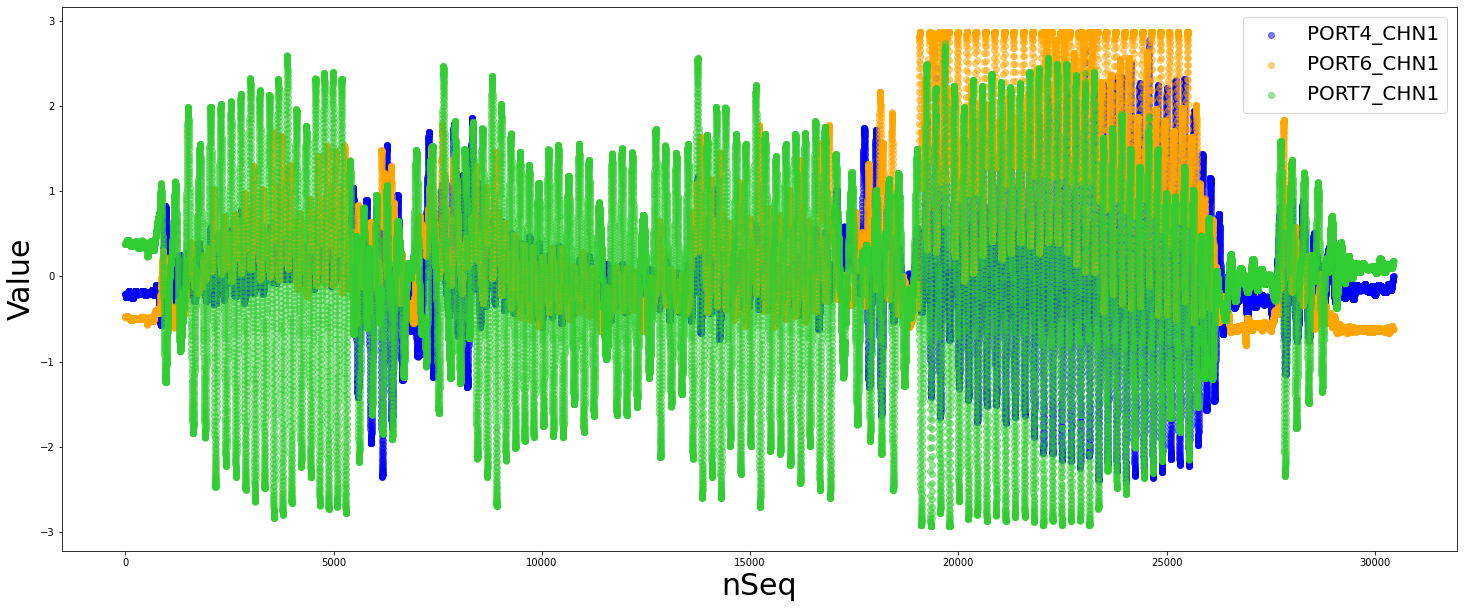

In [25]:
fig, ax = plt.subplots(figsize = (25,10))

for x in parameter:
    ax.scatter(nSeq, sensor[x], color=colors[x], alpha = 0.5)

plt.legend(['PORT4_CHN1', 'PORT6_CHN1', 'PORT7_CHN1'], fontsize = 20)
ax.set_xlabel('nSeq', fontsize = 30)
ax.set_ylabel('Value', fontsize = 30)

Problem 2-2) 1-2와 1-3 모든 parameter를 한 graph에 표현한 것인데, 각 port에 저장된 값들이 매우 촘촘하게 있다보니 scatter한 graph가 line으로 표현한 것보다 데이터를 더 확인하기 어려웠다. line chart와 scatter chart의 큰 차이는 x축 값에 따라 정렬이 되냐 안되냐의 차이인데, scatter의 경우가 정렬이 되는 경우이다. 이 때, x축을 nSeq로 설정을 하였기에 1-2의 그래프와 같은 개형으로 나타나는 것인데, y축 value의 범주가 낮고 값들이 매우 촘촘하게 들어있어 더 확인하기가 어렵다고 판단할 수 있었다. port에 저장된 값들의 범주가 훨씬 더 크다면 point를 확인하기 더 쉬울 것이고, 이를 통해 원하는 x 값(nSeq)에서 어떤 parameter의 값이 더 큰지를 확인할 수 있다. 이는 실제로 센서를 이용한 실험을 진행할 때 환경에 따라 nSeq 값을 바꿔간다면, nSeq에 해당하는 값의 차이를 알아야하기에 line chart보다는 scatter chart로 보는 것이 실험하는 환경을 이해하는데 좀 더 용이할 것으로 판단한다. 

4) There histogram for each parameter

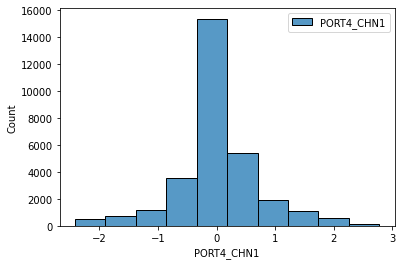

In [29]:
snb.histplot(sensor['PORT4_CHN1'], bins=10, kde=False)
plt.legend(['PORT4_CHN1'], fontsize = 10)

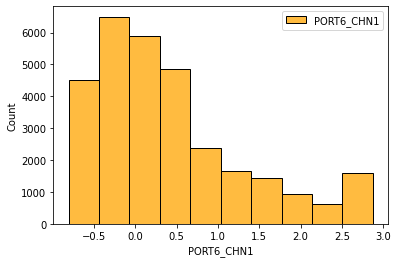

In [30]:
snb.histplot(sensor['PORT6_CHN1'], bins=10, kde=False, color='orange')
plt.legend(['PORT6_CHN1'], fontsize = 10)

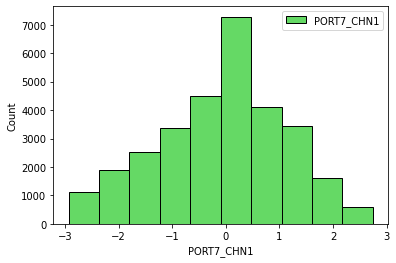

In [31]:
snb.histplot(sensor['PORT7_CHN1'], bins=10, kde=False, color='limegreen')
plt.legend(['PORT7_CHN1'], fontsize = 10)

Problem 2-3) 각 parameter들의 histogram이다. histogram은 데이터의 분포의 대략적인 표현으로 어떤 값들을 많이 보여주는지를 보여준다. 앞서 linechart는 nSeq에 대한 parameter별 데이터의 분포를 보여주었고, histogram은 nSeq와는 관계없이 각 parameter의 값들의 분포를 보여준다. 따라서 linechart의 경우 한 nSeq에 대하여 각 parameter 값들의 대소를 파악하기에 용이해 실험 중에 설정한 환경에 따라 어떤 port에서 가장 큰 값 혹은 가장 작은 값을 얻을 수 있는지 알 수 있다. 즉, 한 가지 상황에 대하여 비교하기에는 linechart가 histogram보다 훨씬 용이하다는 것을 알 수 있다. 하지만 histogram의 경우 data 전체의 분포를 보여주어 어떠한 결과가 가장 많이 도출되었는지를 보여주기에 한 예를 들면 실험을 전부 마친 후 각기 다르게 설정한 환경에서 어떤 port가 가장 높은 평균을 보였는지를 확인하기에 매우 용이하다. 즉, line chart와 histogram은 각각의 장점이 존재하고, 데이터를 분석하는 목적에 따라 사용하는 것이 좋을 것이라고 결론 지을 수 있다.

5) Boxplot for each parameter

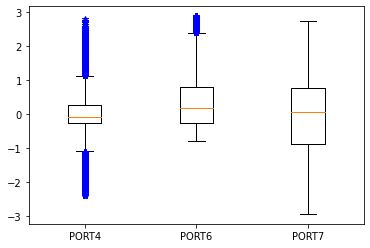

In [33]:
fig, ax = plt.subplots()

ax.boxplot([sensor['PORT4_CHN1'], sensor['PORT6_CHN1'], sensor['PORT7_CHN1']], sym="b*")

plt.xticks([1,2,3],['PORT4', 'PORT6', 'PORT7'])
plt.show()

6) Heatmap of ‘accelerator’ sensor data

<AxesSubplot:>

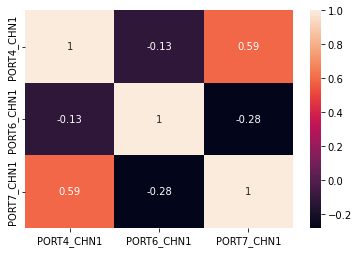

In [16]:
snb.heatmap(sensor.corr(), annot=True)

Problem 2-4) accelerator 데이터의 heatmap이다. 이는 Cluster heat map으로 출력한 결과로, nSeq, PORT4, PORT6, PORT7간의 연관관계를 확인할 수 있다. 색과 네모칸 안의 숫자값으로 매개변수간의 상관관계를 확인할 수 있는데, 색이 짙어지면 짙어질 수록 연관관계가 적은 것이다. 우측에 있는 정보로도 관계를 파악할 수 있고, PORT4와 PORT7이 관계가 가장 높은 것을 알 수 있다. 하지만 이것이 포트 자체의 관계를 나타내는 것은 아니다. 이는 단순히 저장된 값이 비슷하다는 것이고 장치 관련한 정보는 확인할 수 없다. 두 포트의 환경을 다르게 설정하고 측정을 진행하는데 이러한 비슷한 값을 보인다는 것을 통해 설정한 환경이 센서에 끼치는 영향에 대한 해석을 진행할 수 있기에 꽤나 의미있는 정보임을 알 수 있다.

7) Pairplot of ‘accelerator’ sensor data

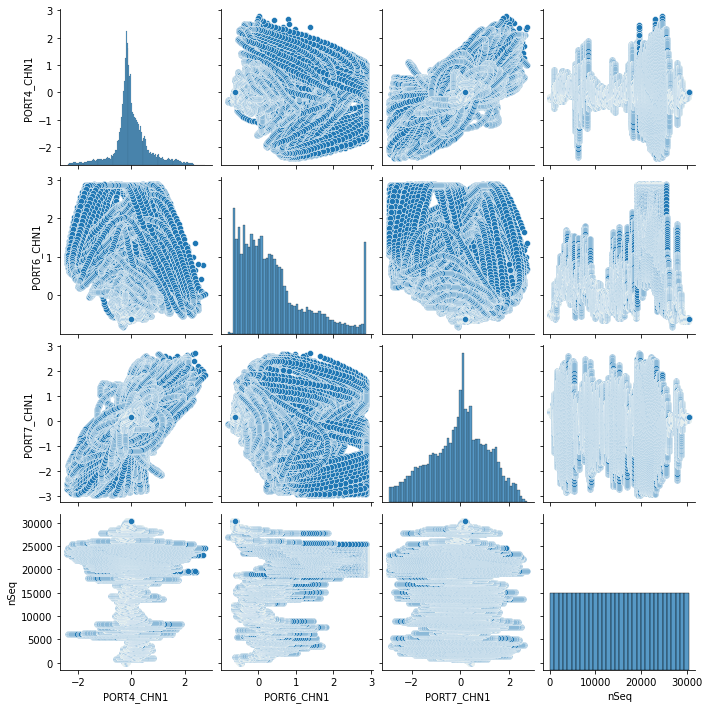

In [17]:
ndf = data[['PORT4_CHN1', 'PORT6_CHN1', 'PORT7_CHN1', 'nSeq']]

fig = snb.pairplot(ndf)

Problem 2-5) 현재 시각화된 pairplot은 16개의 subplots이 존재하고 이들은 dataset의 parameter들을 2가지씩 조합해서 이들의 관계를 보여준다. (1,1)부터 차례대로 대각선 (2,2), (3,3), (4,4)은 동일한 parameter간의 데이터를 비교한 것이다. 대각선이 아닌 다른 부분들은 2개의 parameter의 조합으로 사용된 parameter간의 관계를 나타낸다. 대각선을 기준으로 아래와 위를 나눴을 때 기준 축만 바뀐 것으로 같은 관계라고| 볼 수 있으므로 아래쪽의 데이터만을 해석해도 무방하다. 본래 scatter된 부분들을 통해 각 parameter간의 관계를 파악할 수 있는데, 현재 sensor의 각 parameter에는 많은 양의 데이터가 무분별하게 들어있기에 서로에 대한 관계를 파악하기가 쉽지 않다. 따라서 이러한 데이터를 시각화하여 분석하는데는 크게 좋은 방법이라고 생각하기 어렵다. 하지만 pairplot 방법으로 시각화하면서 잘못될 경우를 고려해 nSeq와 각 port들의 관계를 나타낸 것을 확인하면 앞서 뽑아낸 scatter chart와 같은 모양을 보이고 있는 것을 보아, 데이터간의 관계를 나타내는 pairplot은 잘 수행되었다고 볼 수 있다.

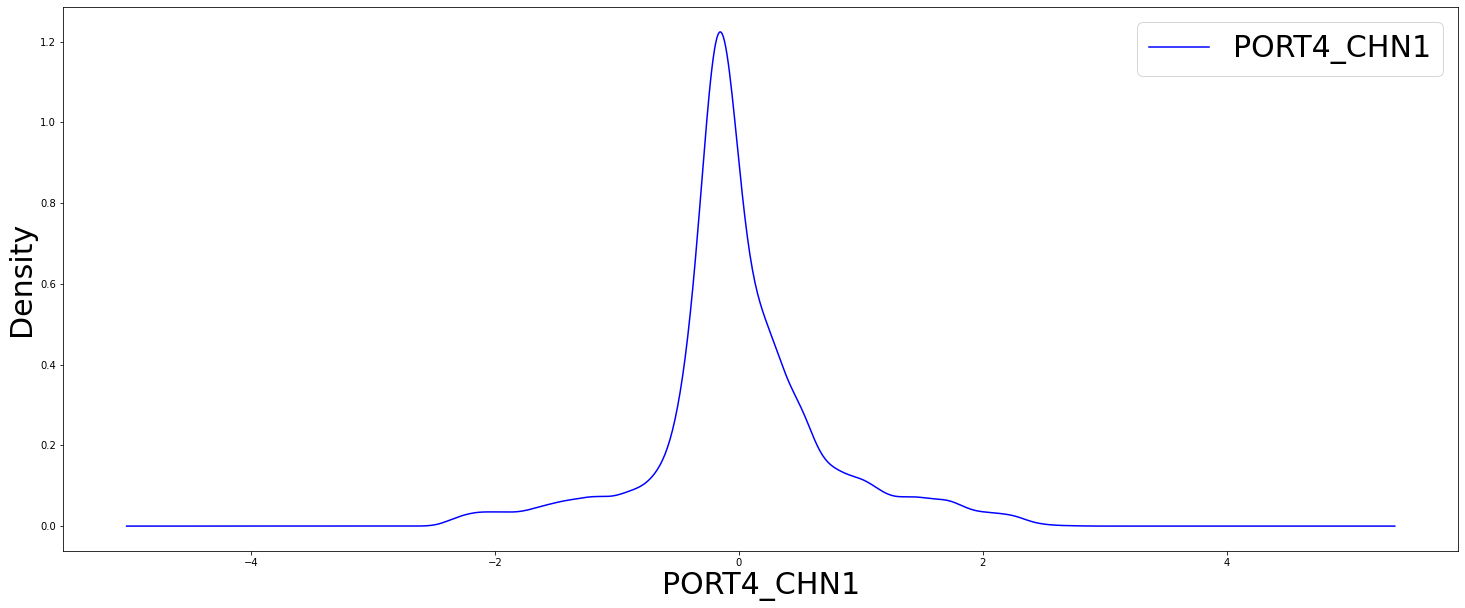

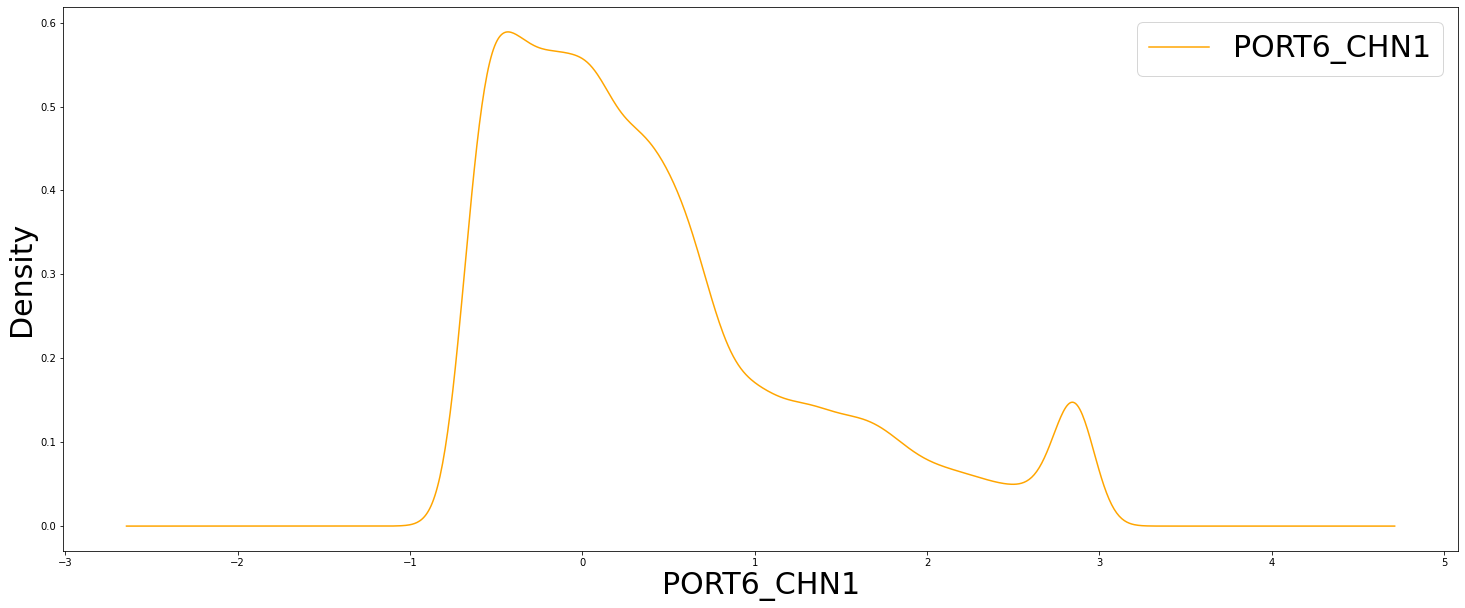

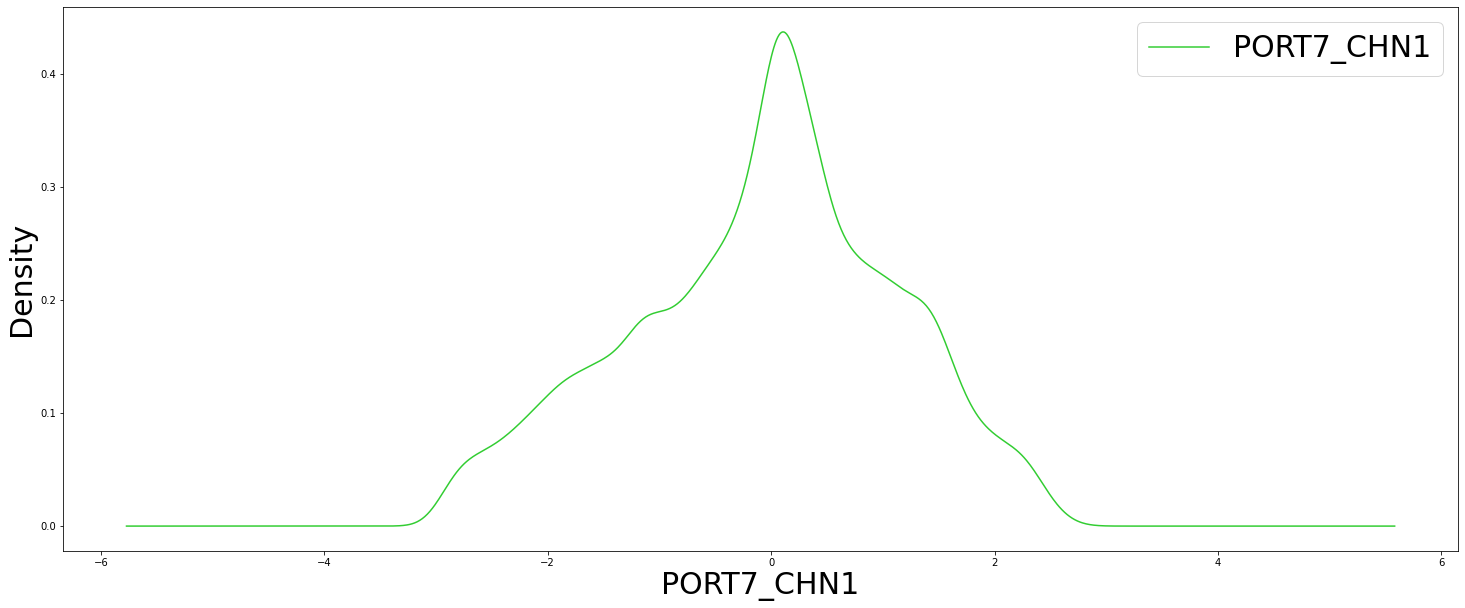

In [36]:
for x in parameter:
    plt.figure(figsize=(25, 10))
    sensor[x].plot.density(color=colors[x])
    plt.legend([x],fontsize = 30)
    plt.xlabel(x,fontsize = 30)
    plt.ylabel('Density' ,fontsize = 30)

Problem 2-6) 각 parameter별로 밀도그래프를 출력해본 결과이다. 이 또한 히스토그램과 비슷하게 값들이 어디에 많이 분포되어있는지를 확인할 수 있는데, 히스토그램의 경우 막대그래프로 표현되므로 빠르고 러프하게 비교를 할 때는 히스토그램이 밀도그래프보다 효과적이지만, 세세하게 비교를 진행할 때는 밀도그래프가 히스토그램보다 더 효과적인 비교를 할 수 있을 것이다.